In [1]:
from datetime import datetime
import pandas as pd
import calendar
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import numpy as np

df = pd.read_csv("whatsapp_Relli.csv")

# i. Finding the Day :

In [2]:
def Dayfinder(Date):
    date_time_obj3 = datetime.strptime(Date, '%m/%d/%Y')
    return calendar.day_name[date_time_obj3.weekday()]

df["Day"] = df["Date"].apply(Dayfinder)


# ii. Adding LastSeenBeforeCurrentOnlineTime column :

In [3]:
df["LastSeenBeforeCurrentOnlineTime"] = df["OnlineTime"].loc[0]
for i in np.arange(1,df["OnlineTime"].count()):   
    df["LastSeenBeforeCurrentOnlineTime"].loc[i]=df["OfflineTime"].loc[i-1]

# iii. Finding the Duration :

In [4]:
def Durationfinder(OfflineTime,OnlineTime):
    OfflineTime = datetime.strptime(OfflineTime, '%H:%M:%S')
    OnlineTime = datetime.strptime(OnlineTime, '%H:%M:%S')
    return ((OfflineTime-OnlineTime).seconds)/60

df["OnlineDurationInMin"] = df[["OfflineTime","OnlineTime"]].apply(lambda df : Durationfinder(df["OfflineTime"],df["OnlineTime"]),axis=1)
df["AwayDurationInMin"] = df[["OnlineTime","LastSeenBeforeCurrentOnlineTime"]].apply(lambda df : Durationfinder(df["OnlineTime"],df["LastSeenBeforeCurrentOnlineTime"]),axis=1)


# iv. Finding the Hour :

In [5]:
def Hourfinder(OnlineTime):
    date_time_obj4 = datetime.strptime(OnlineTime, '%H:%M:%S')
    return date_time_obj4.hour

df["Hour"] = df["OnlineTime"].apply(Hourfinder)


# v. Converting String to Date :


In [6]:
def DateStrToDateConv(Date):
    return datetime.strptime(Date, '%m/%d/%Y')

df["Date"] = df["Date"].apply(DateStrToDateConv)


# 1.Today's data:

In [7]:
df_Today=df[df["Date"]==df["Date"].max()].sort_values("OnlineTime",ascending=False)
df_Today

,Date,OnlineTime,OfflineTime,Day,LastSeenBeforeCurrentOnlineTime,OnlineDurationInMin,AwayDurationInMin,Hour
40,2021-10-21,10:07:19,10:10:08,Thursday,16:41:15,2.816667,1046.066667,10


# 1.a. How much time she spent on each hour for today :

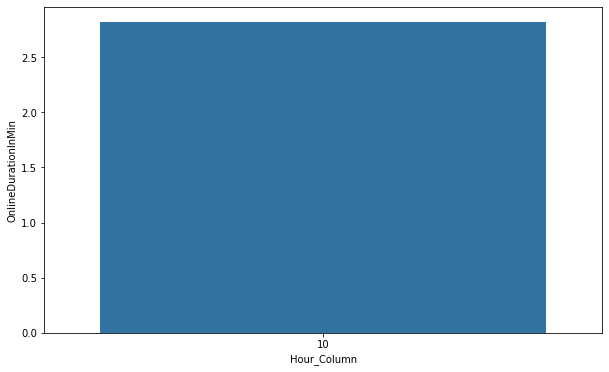

In [8]:
df_Today_GroupbyHour = df_Today.groupby("Hour").sum("OnlineDurationInMin").sort_values("OnlineDurationInMin",ascending=False)
df_Today_GroupbyHour["Hour_Column"] = df_Today_GroupbyHour.index
plt.figure(figsize=(10,6))
sns.barplot(x="Hour_Column",y="OnlineDurationInMin",data=df_Today_GroupbyHour)
plt.show()

# 2. Each day : No.of times logged in,Total/Max/Min time spent  in mins & Last sign out , first sign in for each day :


In [9]:
df_EachDay = pd.DataFrame()
df_EachDay["No.of Times logged in"] = df.groupby("Date").count()["OnlineTime"]
df_EachDay["Total time spent"] = df.groupby("Date").sum()["OnlineDurationInMin"]
df_EachDay["Sign In"] = df.groupby("Date")["OnlineTime"].min()
df_EachDay["Sign Out"] = df.groupby("Date")["OfflineTime"].max()
df_EachDay["Max time spent"] = df.groupby("Date").max()["OnlineDurationInMin"]
df_EachDay["Min time spent"] = df.groupby("Date").min()["OnlineDurationInMin"]
df_EachDay["Sign In Hour"] = df_EachDay["Sign In"].apply(Hourfinder)
df_EachDay["Sign Out Hour"] = df_EachDay["Sign Out"].apply(Hourfinder)
df_EachDay = df_EachDay.reset_index()
df_EachDay = df_EachDay.sort_values("Date",ascending=False)
df_EachDay

,Date,No.of Times logged in,Total time spent,Sign In,Sign Out,Max time spent,Min time spent,Sign In Hour,Sign Out Hour
9,2021-10-21,1,2.816667,10:07:19,10:10:08,2.816667,2.816667,10,10
8,2021-10-20,9,20.816667,07:27:30,16:41:15,11.116667,0.150000,7,16
7,2021-10-19,6,15.766667,08:47:58,22:52:09,9.283333,0.600000,8,22
6,2021-10-18,6,17.233333,12:35:16,23:16:24,15.433333,0.016667,12,23
5,2021-10-14,1,3.116667,20:26:31,20:29:38,3.116667,3.116667,20,20
4,2021-10-09,3,6.016667,10:59:47,14:19:18,2.983333,1.466667,10,14
3,2021-10-08,3,6.250000,13:00:35,13:10:20,4.466667,0.650000,13,13
2,2021-10-06,2,5.550000,09:30:10,09:53:02,5.066667,0.483333,9,9
1,2021-10-04,2,2.283333,07:02:12,08:27:18,1.950000,0.333333,7,8
0,2021-10-03,8,13.616667,13:05:44,20:53:30,4.183333,0.283333,13,20


# 2.a. No.of times logged in each day :

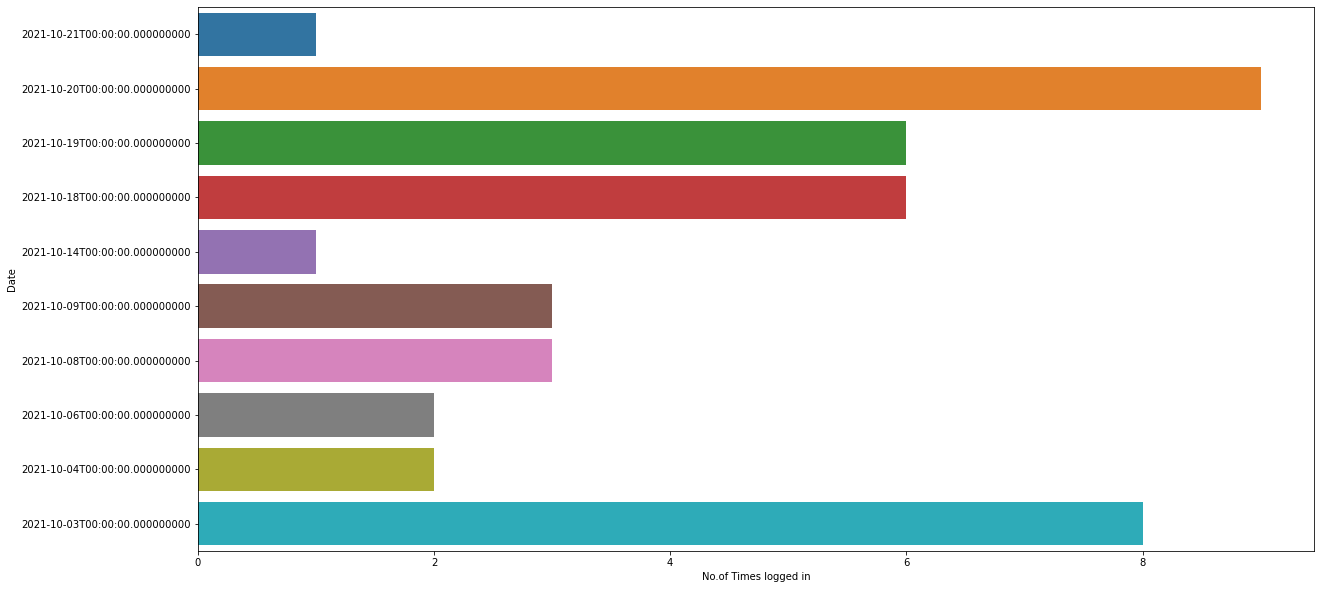

In [10]:
plt.figure(figsize=(20,10))
bin_list1 =  [0,10,20, 30,40,50,60,70,80,90,100]
sns.barplot(y="Date",x="No.of Times logged in",data=df_EachDay)
plt.show()

# 2.b. Total time spent each day :

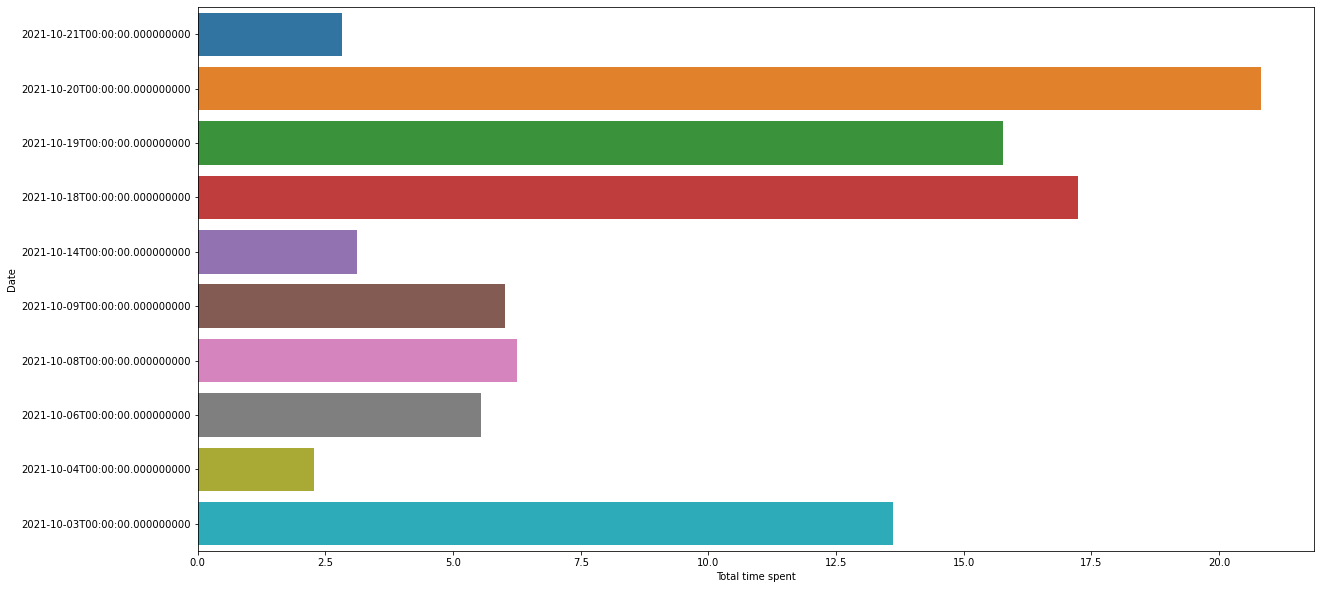

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(y="Date",x="Total time spent",data=df_EachDay)
plt.show()

# 2.c. Total time spent each day in line plot :

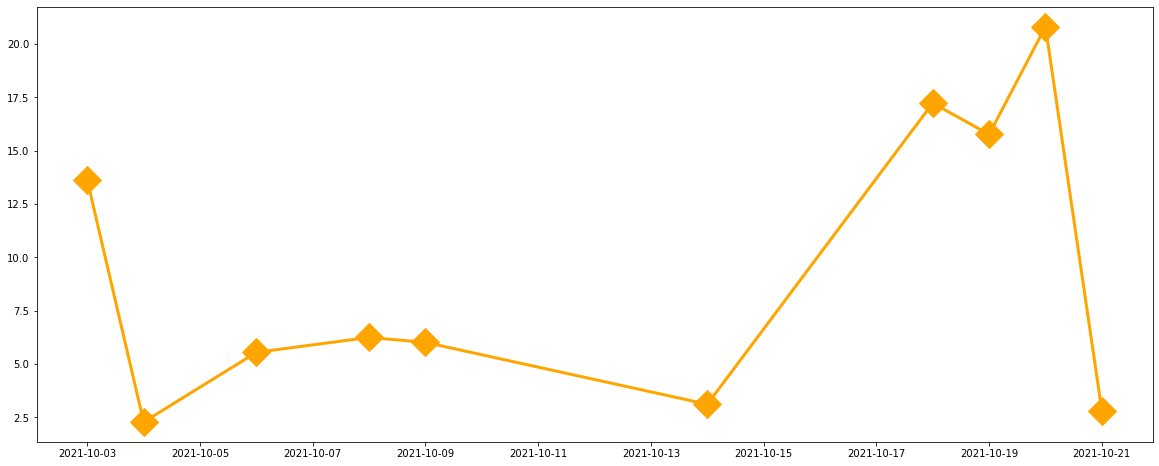

In [12]:
plt.figure(figsize=(20,8))
plt.plot("Date","Total time spent",data=df_EachDay,marker = 'D',linewidth = 3,color = "orange",markersize= 20)
plt.show()

# 2.d. Time spent in Bins vs No.of Occurences :

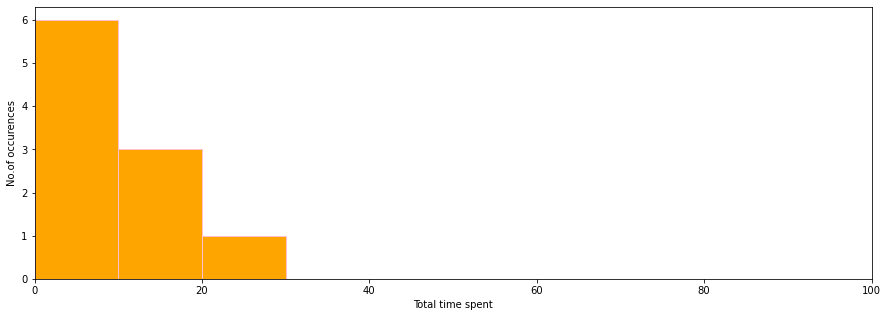

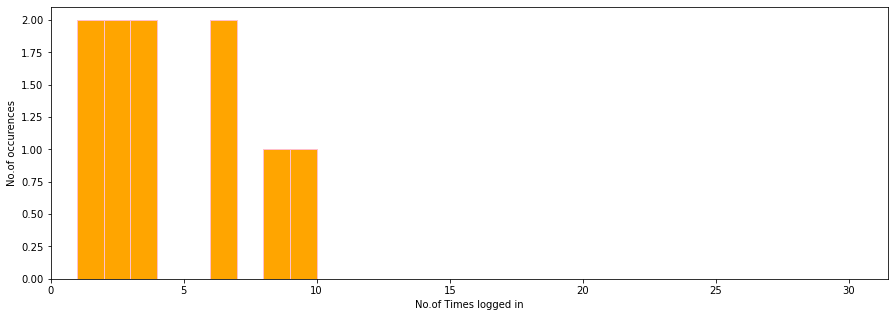

In [13]:
plt.figure(figsize=(15,5))
bin_list1 =  [0,10,20, 30,40,50,60,70,80,90,100]
#bin_list1 =  [0,5, 10,15, 20,25, 30,35, 40,45,50,55,60,65,70,75,80,85,90,95,100]
plt.hist(df_EachDay["Total time spent"],color = "orange",edgecolor="pink", bins =bin_list1 )
plt.xlabel("Total time spent")
plt.ylabel("No.of occurences")
plt.xlim(0,100)
plt.show()
plt.figure(figsize=(15,5))
bin_list2 =  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
plt.hist(df_EachDay["No.of Times logged in"],color = "orange",edgecolor="pink",bins=bin_list2)
plt.xlabel("No.of Times logged in")
plt.ylabel("No.of occurences")
plt.xlim(0)
plt.show()

# 2.e. Overall average of time spent , max time spent, min time spent :

In [14]:
df_OverallAvg = df_EachDay.median()
df_OverallAvg

<ipython-input-14-42bb68b678d9>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_OverallAvg = df_EachDay.median()


No.of Times logged in     3.000000
Total time spent          6.133333
Max time spent            4.325000
Min time spent            0.541667
Sign In Hour             10.000000
Sign Out Hour            15.000000
dtype: float64

# 3. Most Active, Least Active :

#    a. Most active (**Hour is important.)

In [15]:
df_Most_Least_Active = df.groupby("Hour").sum("OnlineDurationInMin")
df_Most_Least_Active = df_Most_Least_Active.reset_index()
df_Most_Least_Active["OnlineDurationInMin"] = df_Most_Least_Active["OnlineDurationInMin"] /df["Date"].nunique()
df_Most_Least_Active=df_Most_Least_Active.sort_values("OnlineDurationInMin",ascending=False)
df_Most_Least_Active = df_Most_Least_Active[["Hour","OnlineDurationInMin"]]
df_Most_Least_Active.head()

,Hour,OnlineDurationInMin
5,12,1.700000
3,10,1.366667
6,13,1.285000
9,16,1.181667
12,20,1.140000


#    b. Least active (**Hour is important.)

In [16]:
df_Most_Least_Active = df_Most_Least_Active.sort_values("OnlineDurationInMin")
df_Most_Least_Active.head()

,Hour,OnlineDurationInMin
14,23,0.041667
8,15,0.048333
13,22,0.148333
10,17,0.186667
1,8,0.198333


 # 4.a. Most active,least active & Avg duration per hour :

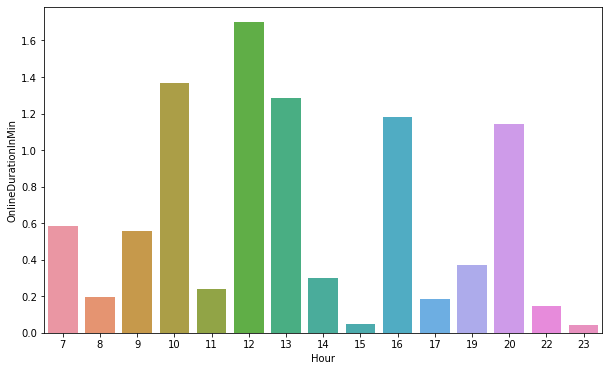

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x="Hour",y="OnlineDurationInMin",data=df_Most_Least_Active)
plt.show()

# 4.b. No .Of Logins Per Hour

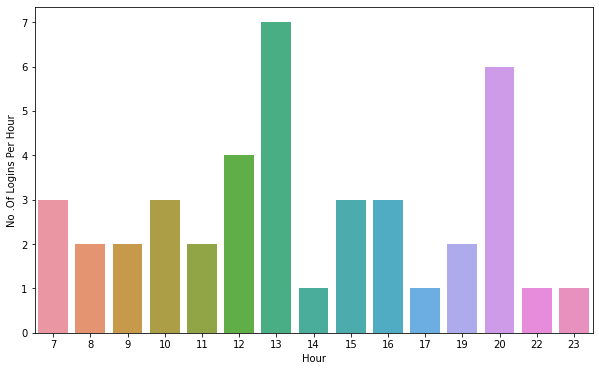

In [18]:
df_NoOfLoginsPerHour = df.groupby("Hour").count()
df_NoOfLoginsPerHour=df_NoOfLoginsPerHour.reset_index()
df_NoOfLoginsPerHour["No .Of Logins Per Hour"] =df_NoOfLoginsPerHour["Date"]
df_NoOfLoginsPerHour = df_NoOfLoginsPerHour[["Hour","No .Of Logins Per Hour"]]
plt.figure(figsize=(10,6))
sns.barplot(y="No .Of Logins Per Hour",x="Hour",data=df_NoOfLoginsPerHour)
plt.show()

# 4.c. Duration & No.of times login per hour:

In [19]:
df_H1 = df.groupby("Hour").sum()
df_H1=df_H1.reset_index()
df_H1=df_H1.sort_values("Hour")
df_H1 = df_H1[["Hour","OnlineDurationInMin"]]
df_H2 = df.groupby("Hour").count()
df_H2 = df_H2.reset_index()
df_H2["No.of times logged in"] = df_H2["OnlineTime"]
df_H2 = df_H2[["Hour","No.of times logged in"]]
df_H3 = pd.merge(df_H1, df_H2, on='Hour', how='inner')
df_H3

,Hour,OnlineDurationInMin,No.of times logged in
0,7,5.866667,3
1,8,1.983333,2
2,9,5.550000,2
3,10,13.666667,3
4,11,2.416667,2
5,12,17.000000,4
6,13,12.850000,7
7,14,2.983333,1
8,15,0.483333,3
9,16,11.816667,3


# 4.d. No.of days she is active on a particular hour:

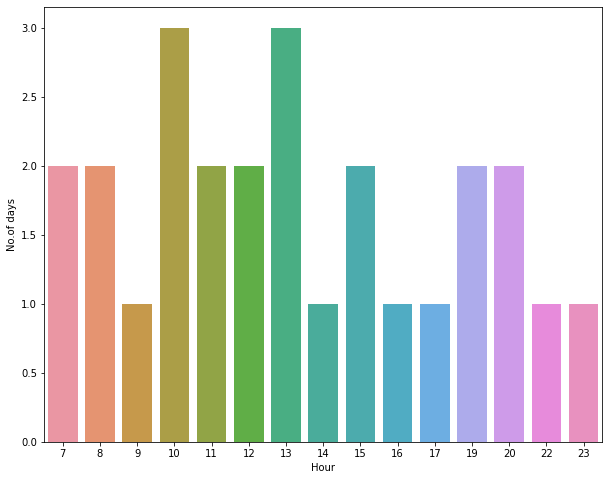

In [20]:
df_grp_Date_Hour = df.groupby(["Date","Hour"]).count()
df_grp_Date_Hour = df_grp_Date_Hour.reset_index()
df_grp_Date_Hour = df_grp_Date_Hour[["Date","Hour"]]
df_grp_Date_Hour_Ult = df_grp_Date_Hour.groupby("Hour").count()
df_grp_Date_Hour_Ult= df_grp_Date_Hour_Ult.reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x="Hour",y="Date",data=df_grp_Date_Hour_Ult)
plt.ylabel("No.of days")
plt.show()

# 5. Avg sign in , sign out Times

# a. Avg Sign In Hour 

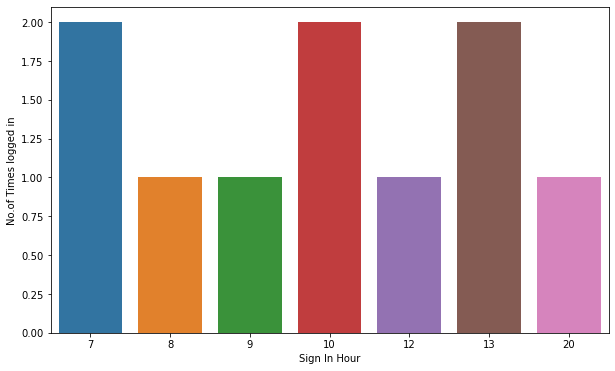

In [21]:
df_EachDay_SignInHour=df_EachDay.groupby("Sign In Hour").count()
df_EachDay_SignInHour=df_EachDay_SignInHour.reset_index()
plt.figure(figsize=(10,6))
sns.barplot(y="No.of Times logged in",x="Sign In Hour",data=df_EachDay_SignInHour)
plt.show()

# b. Avg Sign out Hour 

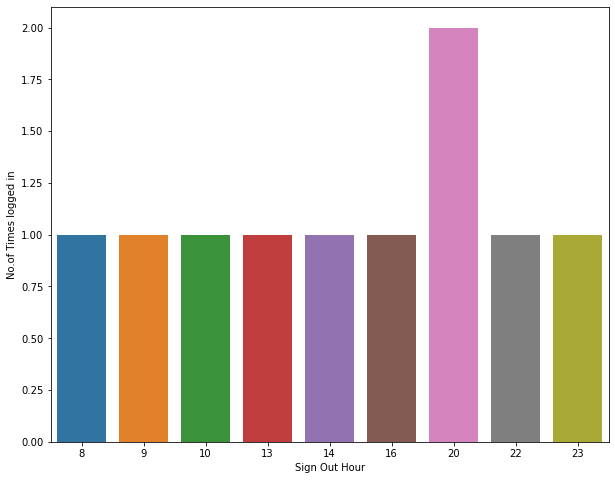

In [22]:
df_EachDay_SignOutHour =df_EachDay.groupby("Sign Out Hour").count()
df_EachDay_SignOutHour = df_EachDay_SignOutHour.reset_index()
plt.figure(figsize=(10,8))
sns.barplot(y="No.of Times logged in",x="Sign Out Hour",data=df_EachDay_SignOutHour)
plt.show()

# c. Sign in hour vs Date graph

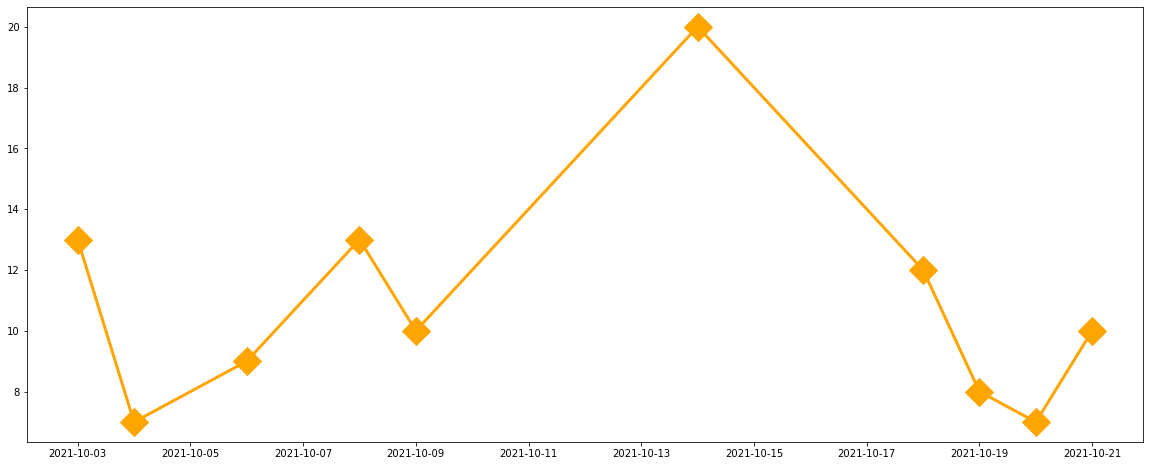

In [23]:
plt.figure(figsize=(20,8))
plt.plot("Date","Sign In Hour",data=df_EachDay,marker = 'D',linewidth = 3,color = "orange",markersize= 20)

# d. Sign in hour vs Date graph

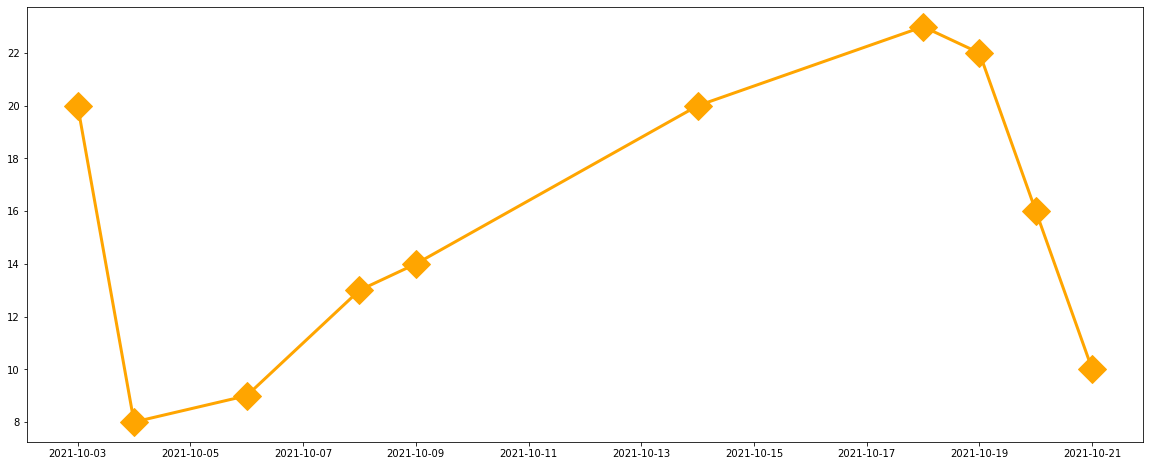

In [24]:
plt.figure(figsize=(20,8))
plt.plot("Date","Sign Out Hour",data=df_EachDay,marker = 'D',linewidth = 3,color = "orange",markersize= 20)

# Plotting & Clustering

plt.scatter(df_EachDay["Total time spent"],df_EachDay["Date"])

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
km = KMeans(n_clusters=3)

df_EachDay_KMeans = df_EachDay[["Total time spent","No.of Times logged in"]]
y_predict = km.fit_predict(df_EachDay_KMeans)
df_EachDay_KMeans["Clusters"] = y_predict

df_EachDay_KMeans_0 = df_EachDay_KMeans[df_EachDay_KMeans["Clusters"] == 0]
df_EachDay_KMeans_1 = df_EachDay_KMeans[df_EachDay_KMeans["Clusters"] == 1]
df_EachDay_KMeans_2 = df_EachDay_KMeans[df_EachDay_KMeans["Clusters"] == 2]

df_EachDay_KMeans_0
df_EachDay_KMeans_1
df_EachDay_KMeans_2

plt.scatter(df_EachDay_KMeans_0["Total time spent"],df_EachDay_KMeans_0["No.of Times logged in"],color = "green")
plt.scatter(df_EachDay_KMeans_1["Total time spent"],df_EachDay_KMeans_1["No.of Times logged in"],color = "orange")
plt.scatter(df_EachDay_KMeans_2["Total time spent"],df_EachDay_KMeans_2["No.of Times logged in"],color = "blue")

plt.xlabel("Total time spent")
plt.ylabel("No.of Times logged in")
plt.legend()

#scaler  = MinMaxScaler()
#scaler.fit(df_EachDay_KMeans["Total time spent"])
#df_EachDay_KMeans["Total time spent"] = scaler.transform(df_EachDay_KMeans["Total time spent"])


plt.figure(figsize=(20,10))
palette ={5: "C0", 6: "C1", 7: "C2", 8: "C3",9: "C4", 10: "C5", 11: "C6", 12: "C7", 13: "C8", 14: "C9", 15: "C10", 16: "C11", 17: "C12", 18: "C13", 19: "C14", 20: "C15", 21: "C16"}
sns.scatterplot(y="OnlineDurationInMin",x="AwayDurationInMin",data=df,hue="Hour",palette=palette,marker = 'D')
plt.xlim((0,25))

sns.scatterplot(y="OnlineDurationInMin",x="AwayDurationInMin",data=df,hue="Hour")
plt.xlim((200,400))

sns.scatterplot(y="OnlineDurationInMin",x="AwayDurationInMin",data=df,hue="Hour")
plt.xlim((400,800))


plt.scatter("OnlineDurationInMin","AwayDurationInMin",data=df)
plt.scatter("OnlineDurationInMin","AwayDurationInMin",data=df)

df1_16 = df.groupby(["Day","Date"]).size().reset_index().sort_values("Day")
df2_16 =df.groupby(["Day","Date"]).sum().reset_index().sort_values("Day")
result = pd.concat([df1_16, df2_16], axis=1, join='inner',)

df_Today=df.sort_values("OnlineTime",ascending=False)
X=df_Today[["Hour","AwayDurationInMin"]]
y=df_Today["OnlineDurationInMin"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

#print(lm.predict(X.loc[[126]]))
#print(y.loc[[126]])

sns.distplot((y_test-predictions))

#sns.barplot(y="No.of Times logged in",x="Sign In Hour",data=df_EachDay_SignInHour)

sns.distplot(df_EachDay_SignInHour["Sign In Hour"])

df_AvgTimespentTrend

No_OfDays =  df_EachDay["Date"].nunique()
import array as arr
df_arr = arr.array('f')
sum=0
for i in np.arange(0,No_OfDays):
    for j in np.arange(0,i+1):
        temp= df_EachDay.iloc[j]["Total time spent"]
        sum = sum+temp
    Avg = sum/(i+1)
    df_arr.append(round(Avg, 2))
    sum=0
series = pd.Series(df_arr) 
df_AvgTimespentTrend = pd.DataFrame()
df_AvgTimespentTrend["Avg"] = series

df_EachDay= df_EachDay.sort_values("Date")
df_EachDay["AvgTimespentTrend"]=df_AvgTimespentTrend["Avg"]
df_EachDay
No_OfDays =  df_EachDay["Date"].nunique()
import array as arr
df_arr = arr.array('f')
sum=0
for i in np.arange(0,No_OfDays):
    for j in np.arange(0,i+1):
        temp= df_EachDay.iloc[j]["Total time spent"]
        sum = sum+temp
    Avg = sum/(i+1)
    df_arr.append(round(Avg, 2))
    sum=0
series = pd.Series(df_arr) 
df_AvgTimespentTrend = pd.DataFrame()
df_AvgTimespentTrend["Avg"] = series
df_AvgTimespentTrend["Date"] = df_EachDay["Date"].sort_values(ascending=False)
#plt.figure(figsize=(20,8))
#plt.plot("Date","Avg",data=df_AvgTimespentTrend,marker = 'D',linewidth = 3,color = "orange",markersize= 20)
#plt.xlabel("Date")
#plt.ylabel("Avg online time Trend")#series

In [25]:
df_H3.sort_values("OnlineDurationInMin",ascending=False)

,Hour,OnlineDurationInMin,No.of times logged in
5,12,17.000000,4
3,10,13.666667,3
6,13,12.850000,7
9,16,11.816667,3
12,20,11.400000,6
0,7,5.866667,3
2,9,5.550000,2
11,19,3.683333,2
7,14,2.983333,1
4,11,2.416667,2
